Este Jupyter Notebook foi criado para uso exclusivo no o curso MAC0209 - Modelagem e Simulação.

Roberto M. Cesar Jr

rmcesar@usp.br

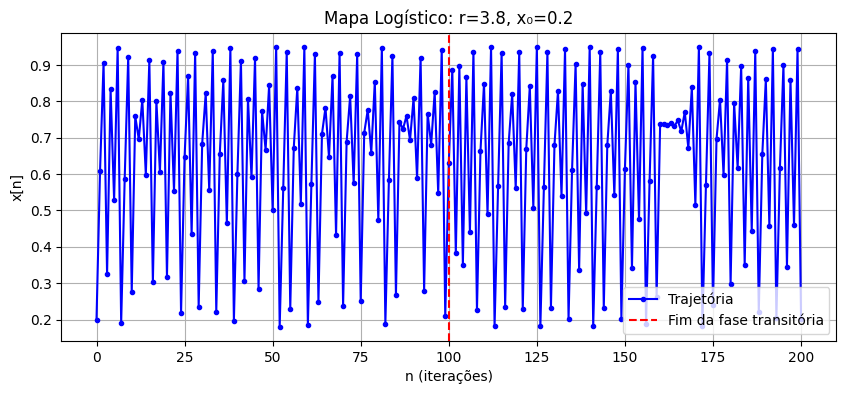

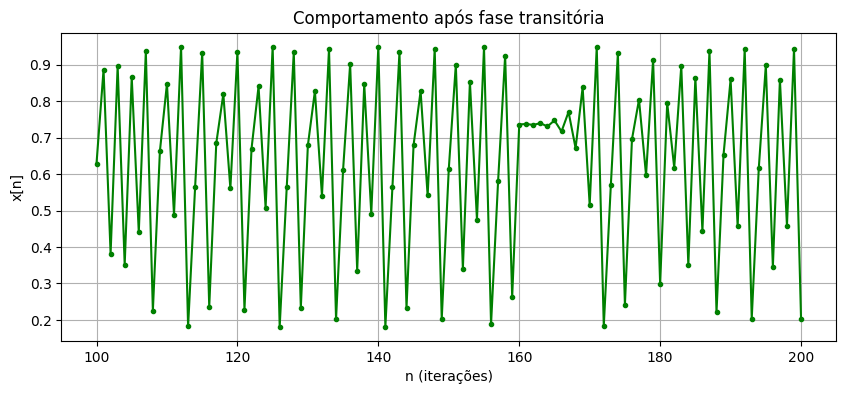

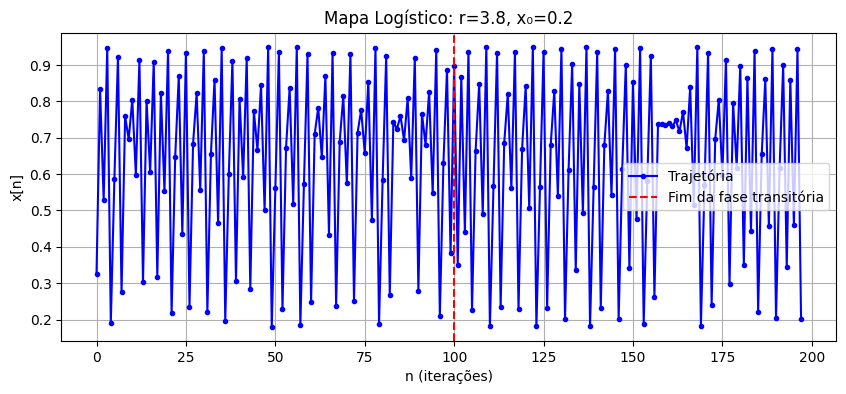

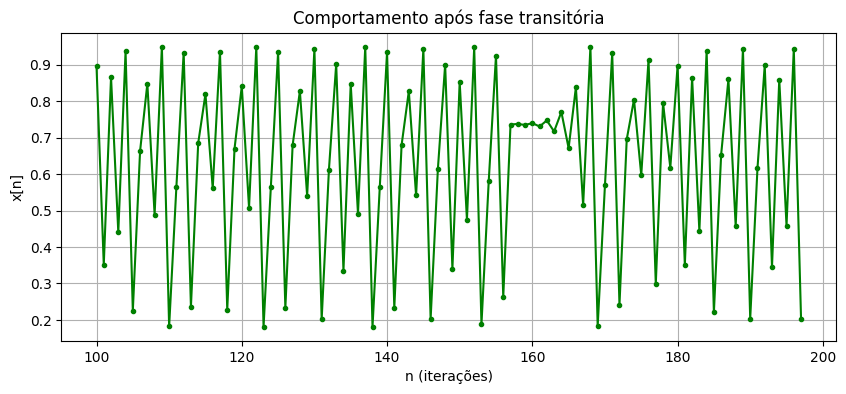

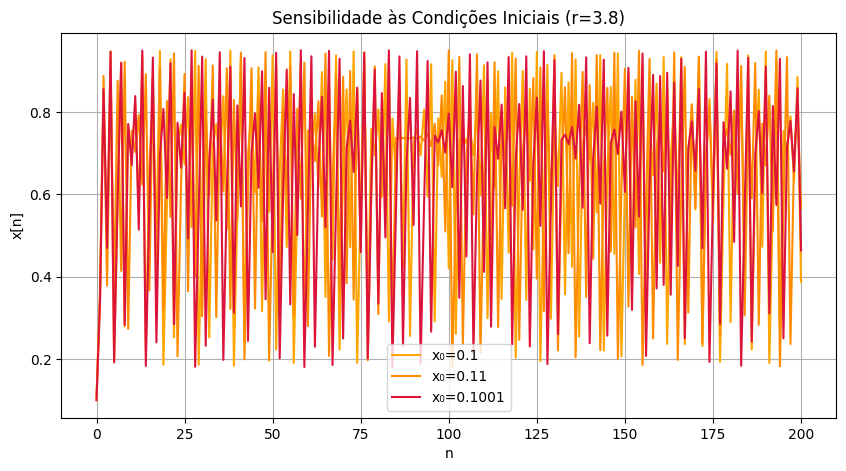

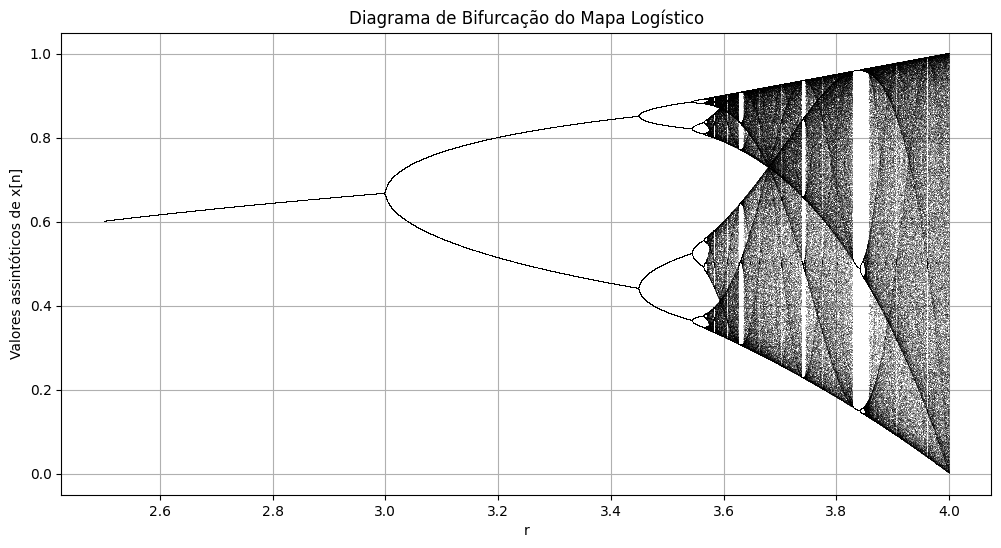

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Mapa logístico
def logistic_map(x, r):
    return r * x * (1 - x)

# Trajetória a partir de uma semente
def gerar_trajetoria(x0, r, n_iter):
    x = np.zeros(n_iter + 1)
    x[0] = x0
    for i in range(n_iter):
        x[i+1] = logistic_map(x[i], r)
    return x

# Plot da trajetória com fase transitória destacada
def plot_trajetoria(x, r, x0, n_transient):
    plt.figure(figsize=(10, 4))
    plt.plot(x, 'b.-', label='Trajetória')
    plt.axvline(n_transient, color='r', linestyle='--', label='Fim da fase transitória')
    plt.title(f"Mapa Logístico: r={r}, x₀={x0}")
    plt.xlabel("n (iterações)")
    plt.ylabel("x[n]")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(range(n_transient, len(x)), x[n_transient:], 'g.-')
    plt.title("Comportamento após fase transitória")
    plt.xlabel("n (iterações)")
    plt.ylabel("x[n]")
    plt.grid(True)
    plt.show()

# Sensibilidade às condições iniciais (sementes)
def plot_multiplas_sementes(seeds, r, n_iter):
    plt.figure(figsize=(10, 5))
    cores = ['orange', 'darkorange', 'crimson']
    for i, seed in enumerate(seeds):
        x = [seed]
        for _ in range(n_iter):
            x.append(logistic_map(x[-1], r))
        plt.plot(x, label=f'x₀={seed}', color=cores[i])
    plt.title(f"Sensibilidade às Condições Iniciais (r={r})")
    plt.xlabel("n")
    plt.ylabel("x[n]")
    plt.legend()
    plt.grid(True)
    plt.show()

# Diagrama de bifurcação
def plot_diagrama_bifurcacao(r_min=2.5, r_max=4.0, n_r=10000, n_total=1000, n_display=100):
    r_vals = np.linspace(r_min, r_max, n_r)
    x = 1e-5 * np.ones_like(r_vals)
    plt.figure(figsize=(12, 6))
    for i in range(n_total):
        x = logistic_map(x, r_vals)
        if i >= (n_total - n_display):
            plt.plot(r_vals, x, ',k', alpha=0.25)
    plt.title("Diagrama de Bifurcação do Mapa Logístico")
    plt.xlabel("r")
    plt.ylabel("Valores assintóticos de x[n]")
    plt.grid(True)
    plt.show()

def main():
    # -------------------------------
  # PROGRAMA PRINCIPAL
  # -------------------------------

  caosR = True
  if (caosR):
    # Parâmetros principais
    r = 3.8              # Parâmetro do mapa logístico
    x0 = 0.2             # Semente (seed)
  else:
    # Parâmetros principais
    r = 2.5              # Parâmetro do mapa logístico
    x0 = 0.1             # Semente (seed)

  n_iter = 200         # Número total de iterações
  n_transient = 100    # Tamanho da fase transitória

  # Trajetória com destaque da fase transitória
  traj = gerar_trajetoria(x0, r, n_iter)
  plot_trajetoria(traj, r, x0, n_transient)

  plot_trajetoria(traj[3:], r, x0, 100)

  # Sensibilidade a sementes iniciais próximas
  seeds = [0.1, 0.11, 0.1001]
  plot_multiplas_sementes(seeds, r, n_iter)

  # Diagrama de bifurcação
  plot_diagrama_bifurcacao()

main()
